# Фрактал Ньютона

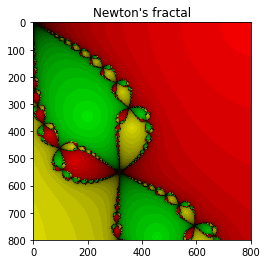

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from cmath import *
from PIL import Image

imgx = 800
imgy = 800
image = Image.new("RGB", (imgx, imgy))

# Задаем значения на комплексной плоскости
xa = -2.0
xb = 2.0
ya = -2.0
yb = 2.0

epsilon = 1E-6
iters = 20

#корни уравнения
a1 = cos(pi/3)+1j*sin(pi/3)
a2 = cos((-1.0)*pi/3)+1j*sin((-1.0)*pi/3)
solutions = [1.0,  a1, a2]
colors = [(1, 0, 0), (1, 1, 0), (0, 1, 0)]

for re in range(imgx):
    for im in range(imgy):
        z = (re+1j*im)/imgx
        for i in range(iters):
            try:
                z -= (z**3-1)/(3*z**2)
            except ZeroDivisionError:
                continue
            if abs(z**3-1) < epsilon:
                break
    
#задаем глубину цвета в зависимости от итераций
            color_depth = int((iters-i)*255.0/iters)

#сопостовляем цвет корню уравнения
            err = [abs(z-root) for root in solutions]
            distances = zip(err, range(len(colors)))
        
#выбираем цвет по корню уравнения
            color = [i*color_depth for i in colors[min(distances)[1]]]
            image.putpixel((re, im), tuple(color))
plt.imshow(image)
plt.title("Newton's fractal")